Epoch 1/20


C:\Users\Minseok\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0125
Epoch 2/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0559e-04
Epoch 3/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9367e-04
Epoch 4/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7699e-04
Epoch 5/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4959e-04
Epoch 6/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2652e-04
Epoch 7/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1876e-04
Epoch 8/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1599e-04
Epoch 9/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0323e-04
Epoch 10/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0752e-04
Epoch 11/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0169e-04
Epoch 12/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0305e-04
Epoch 13/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4284e-05
Epoch 14/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.7100e-05
Epoch 15/20
253/

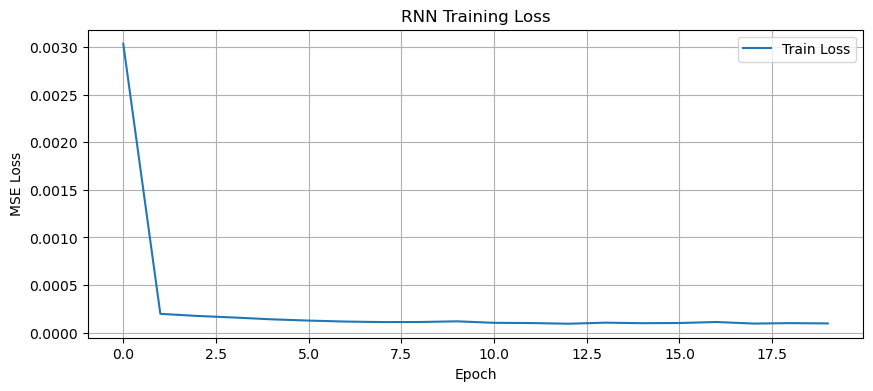

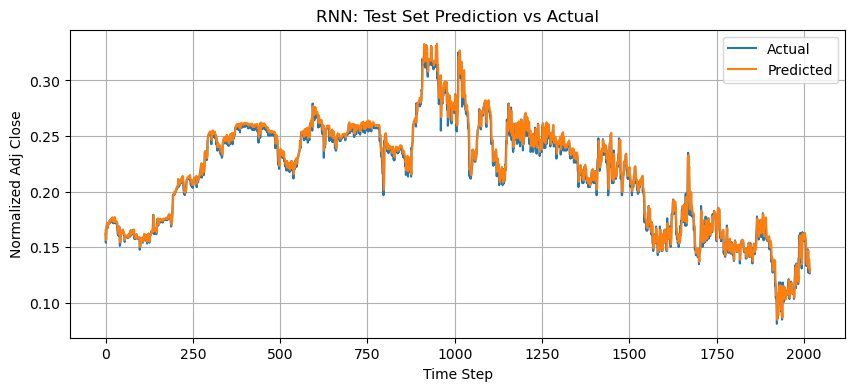

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv("AAME.csv")
data = df['Adj Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

def create_sequences(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(data_scaled, window_size)

# 2. 훈련/테스트 분할 (8:2)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 3. RNN 모델 구성
model_rnn = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])
model_rnn.compile(optimizer=Adam(), loss='mse')

# 4. 모델 학습 (학습 이력(history) 저장)
history_rnn = model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# 5. 테스트셋에 대한 예측 및 평가
y_pred_rnn = model_rnn.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print("RNN MSE:", mse_rnn)

# 6. 학습 손실(loss) 그래프 그리기
plt.figure(figsize=(10, 4))
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.title('RNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# 7. 테스트셋 예측 결과 vs 실제값 그래프
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='Predicted')
plt.title('RNN: Test Set Prediction vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Normalized Adj Close')
plt.legend()
plt.grid(True)
plt.show()
